### Analítica
Vamos a utilizar los datos de ventas de Johnson&Johnson

In [1]:
# librerias
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

from pmdarima.arima import auto_arima
from pmdarima.arima import ARIMA

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error # corrige este deprecated



In [3]:
data = pd.read_csv('data/jj.csv', index_col=0)
print(len(data))
data.head()

84


,data
date,
1960-01-01,0.71
1960-04-01,0.63
1960-07-02,0.85
1960-10-01,0.44
1961-01-01,0.61


DatetimeIndex(['1960-01-01', '1960-04-01', '1960-07-02', '1960-10-01',
               '1961-01-01', '1961-04-02', '1961-07-02', '1961-10-01',
               '1962-01-01', '1962-04-02', '1962-07-02', '1962-10-01',
               '1963-01-01', '1963-04-02', '1963-07-02', '1963-10-01',
               '1964-01-01', '1964-04-01', '1964-07-02', '1964-10-01',
               '1965-01-01', '1965-04-02', '1965-07-02', '1965-10-01',
               '1966-01-01', '1966-04-02', '1966-07-02', '1966-10-01',
               '1967-01-01', '1967-04-02', '1967-07-02', '1967-10-01',
               '1968-01-01', '1968-04-01', '1968-07-02', '1968-10-01',
               '1969-01-01', '1969-04-02', '1969-07-02', '1969-10-01',
               '1970-01-01', '1970-04-02', '1970-07-02', '1970-10-01',
               '1971-01-01', '1971-04-02', '1971-07-02', '1971-10-01',
               '1972-01-01', '1972-04-01', '1972-07-02', '1972-10-01',
               '1973-01-01', '1973-04-02', '1973-07-02', '1973-10-01',
      

In [1]:
# Piensa cómo lo debes procesar para que la serie temporal funcione

In [11]:
data4

,data
date,
1960-01-01,0.71
1960-04-01,0.63
1960-07-01,0.85
1960-10-01,0.44
1961-01-01,0.61
...,...
1979-10-01,9.99
1980-01-01,16.20
1980-04-01,14.67


In [12]:
# fijamos la frecuencia

,data
date,
1960-01-01,0.71
1960-04-01,0.63
1960-07-01,0.85
1960-10-01,0.44
1961-01-01,0.61
...,...
1979-10-01,9.99
1980-01-01,16.20
1980-04-01,14.67


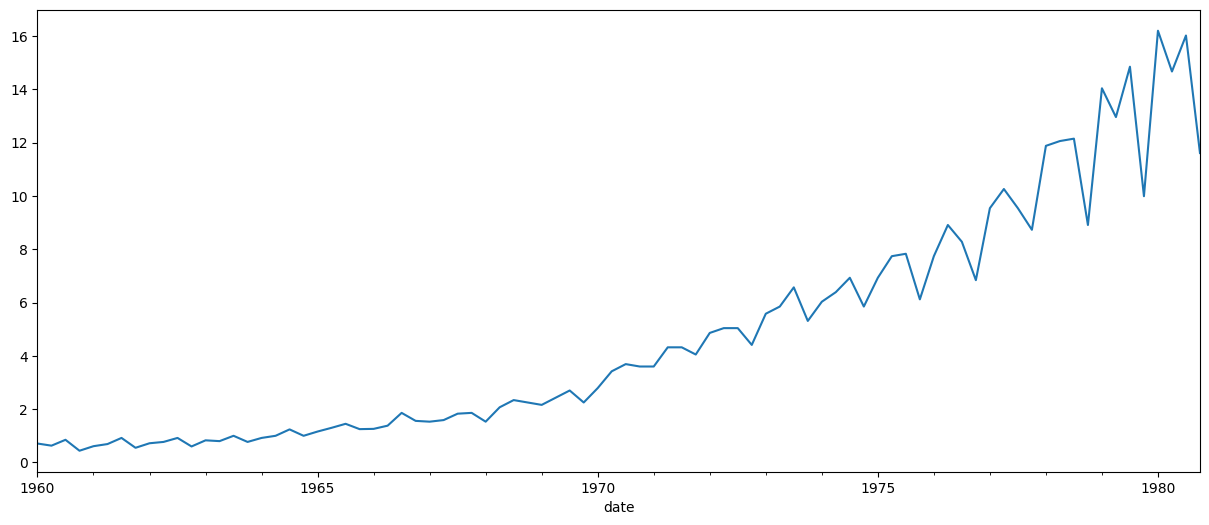

In [13]:
data4['data'].plot(figsize=(15,6));

Se aprecia en la gráfica que presenta diferentes estadísticos a lo largo del tiempo.

Representamos su gráfica de autocorrelación. Vemos que tenemos muy complicado determinar el orden p y q, de cara al modelo ARIMA.

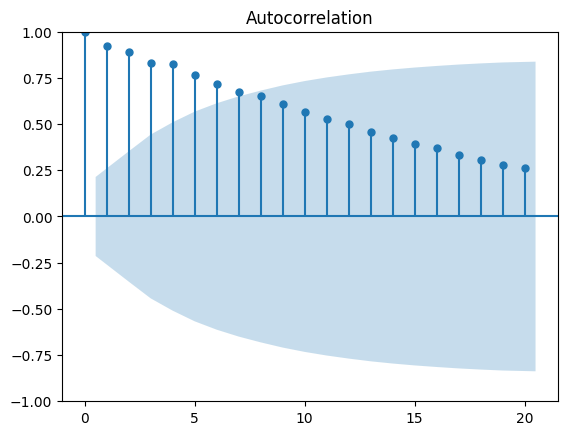

Dividimos en train y test

In [15]:
# 18 años para entrenar y 3 para testear, por ejemplo

72

True

(84,)

12

## Autoregressive
Tendremos que encontrar el orden de autoregression que mejor encaje con nuestros datos.

ARIMA(order=(1, 0, 0))

mean_squared_error: 27.609667896561806


In [23]:
model_ar.predict(12)

array([8.64660869, 8.56475497, 8.48440951, 8.40554454, 8.32813276,
       8.2521474 , 8.17756218, 8.1043513 , 8.03248943, 7.96195172,
       7.89271376, 7.82475161])

In [24]:
test.shape

(12,)

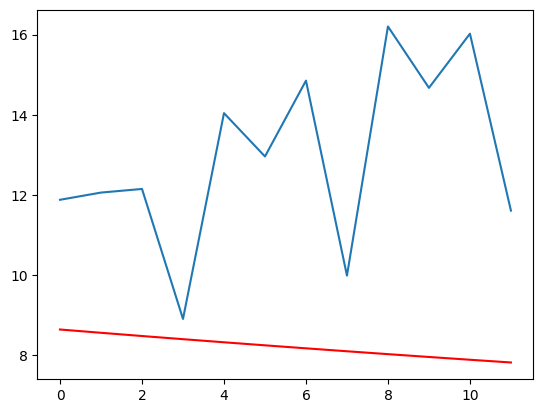

In [25]:
plt.plot(test)
plt.plot(predictions,color='red');

No parece que de buen resultado el AR(1,0,0). Probemos diferentes lags, a ver cuál sería el mejor

c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserW

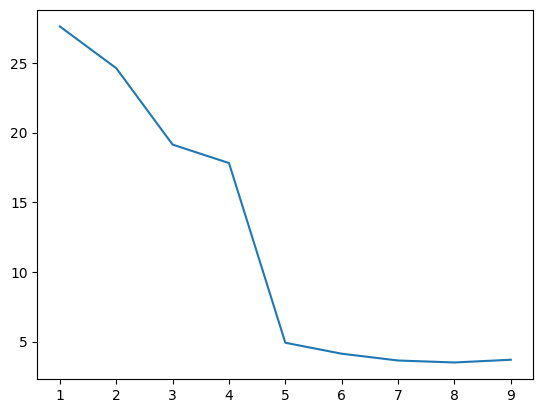

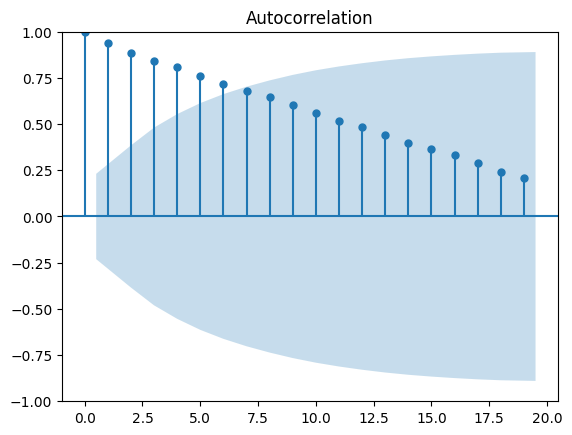

Un parámetro p>5 parece que da buen resultado, pero aun asi es muy alto el error.

## Moving Average
En este caso tendremos en cuenta los errores. El problema es que si tenemos muchos errores al principio, los iremos arrastrando durante las predicciones.

ARIMA(order=(0, 0, 1))

In [30]:
predictions = model_ma.predict(12)
print("mean_squared_error:", mean_squared_error(test, predictions))

mean_squared_error: 92.74704974476823


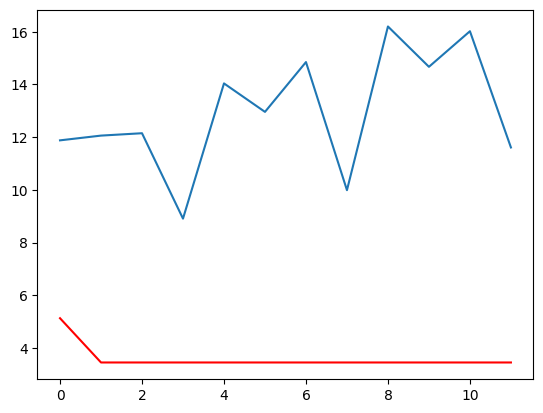

In [31]:
plt.plot(test)
plt.plot(predictions,color='red');

No está dando buen resultado. Probaremos entonces varios lags

c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to conver

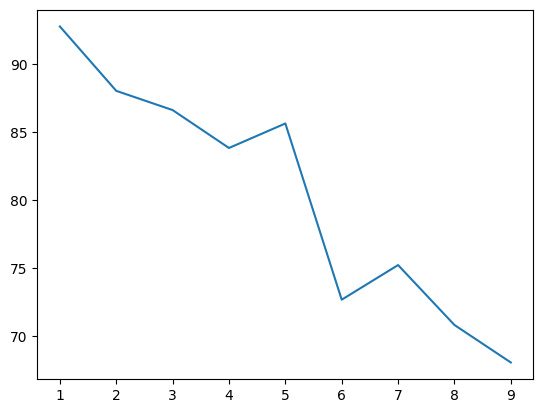

Parece que según vamos aumentando el parámetro `q` del modelo Moving Average, va disminuyendo el error, pero aun así es bastante grande.

## ARIMA
En el arima no solo influyen los parámetros `p` y `q`, sino que también tendremos en cuenta `d`. Parametro con el que diferenciaremos la serie y conseguiremos que sea estacionaria.

Ahora bien, ¿cuál es la mejor combinación de parámetros? Tendremos que realizar varias pruebas. Para comparar los modelos se suele utilizar el AIC.

### AIC
Akaike’s Information Criterion

![imagen](./img/aic.png)

k es el número de parámetros del modelo estadístico y L es el máximo valor de la función de verosimilitud para el modelo estimado. La función de verosimilitud permite realizar inferencias a partir de u conjunto de observaciones.

Se utiliza para seleccionar el mejor modelo, que será el que tiene menor AIC. El AIC depende mucho de cada dato, y es una medida de comparación entre modelos, no de presentación de resultados. Un AIC bajo no quiere decir que el modelo sea muy bueno. Por tanto, AIC no nos dice nada sobre la calidad del modelo en terminos absolutos.


#### ¿Cómo conseguir los mejores p, d, q?

In [33]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq[:6]


[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 1, 0)]

c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to conver

In [35]:
resultados_df = pd.DataFrame(results, columns=['ARIMA params', 'AIC']).sort_values('AIC')
resultados_df.head()

,ARIMA params,AIC
87,"(3, 2, 2)",40.423433
111,"(4, 2, 1)",40.457477
112,"(4, 2, 2)",41.569068
88,"(3, 2, 3)",41.848402
113,"(4, 2, 3)",43.065178


Ya tenemos la mejor combinación de parámetros para el ARIMA. Probemos el modelo

In [36]:
best_model = ARIMA(order=(3,2,2))
best_model.fit(train)

c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(order=(3, 2, 2))

In [37]:
predictions = best_model.predict(12)
print("mean_squared_error:", mean_squared_error(test, predictions))

mean_squared_error: 3.433915321870907


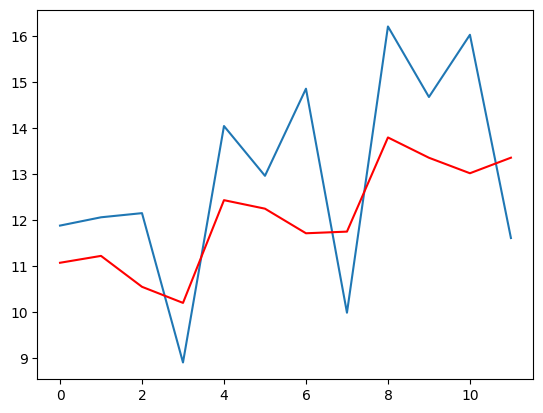

In [38]:
plt.plot(test)
plt.plot(predictions,color='red');

In [39]:
from sklearn.metrics import mean_absolute_percentage_error

print("RMSE:", np.sqrt(mean_squared_error(test, predictions)))
print("MAPE:", mean_absolute_percentage_error(test, predictions) * 100)

RMSE: 1.8530826538152332
MAPE: 12.89204097703901


### Auto ARIMA

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=202.428, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=191.104, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=176.174, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=122.634, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=49.084, Time=0.08 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=46.162, Time=0.64 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=46.808, Time=0.22 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=47.290, Time=0.23 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=45.468, Time=0.16 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=90.745, Time=0.09 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=47.187, Time=0.20 sec
 ARIM

c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   72
Model:               SARIMAX(3, 2, 2)   Log Likelihood                 -13.212
Date:                Fri, 27 Sep 2024   AIC                             40.423
Time:                        14:14:40   BIC                             56.163
Sample:                             0   HQIC                            46.675
                                 - 72                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0188      0.003      6.263      0.000       0.013       0.025
ar.L1         -1.1071      0.052    -21.260      0.000      -1.209      -1.005
ar.L2         -1.0629      0.049    -21.579      0.0

c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [42]:
# SARIMA añadiendo la estacionalidad de los XXXXX



 ARIMA(0,1,0)(0,1,0)[4]             : AIC=51.280, Time=0.01 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=53.242, Time=0.02 sec
 ARIMA(0,1,0)(0,1,2)[4]             : AIC=54.563, Time=0.06 sec
 ARIMA(0,1,0)(1,1,0)[4]             : AIC=53.250, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[4]             : AIC=55.132, Time=0.04 sec
 ARIMA(0,1,0)(1,1,2)[4]             : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(2,1,0)[4]             : AIC=54.590, Time=0.02 sec
 ARIMA(0,1,0)(2,1,1)[4]             : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(2,1,2)[4]             : AIC=inf, Time=0.31 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=40.977, Time=0.02 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=41.494, Time=0.04 sec
 ARIMA(0,1,1)(0,1,2)[4]             : AIC=43.487, Time=0.07 sec
 ARIMA(0,1,1)(1,1,0)[4]             : AIC=41.514, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[4]             : AIC=43.489, Time=0.10 sec
 ARIMA(0,1,1)(1,1,2)[4]             : AIC=44.749, Time=0.24 sec
 ARIMA(0,1,1)(2,1,0)[4]             : AIC=43.481,

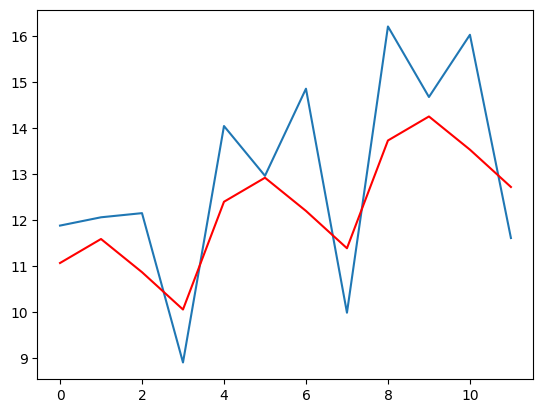

In [43]:
predictions = model.predict(12)
plt.plot(test)
plt.plot(predictions,color='red');

In [44]:
print("RMSE:", np.sqrt(mean_squared_error(test, predictions)))
print("MAPE:", mean_absolute_percentage_error(test, predictions) * 100)

RMSE: 1.5616848071339056
MAPE: 10.108466424976251


## ARIMAX
La X viene de exogenous. Significa que le podemos añadir una variable externa con la que entrenar el modelo.

Vamos a probar con los datos de la bolsa. Primero un auto_arima con los datos a cierre. Y después un auto_arima acompañado de los datos de apertura de bolsa, a ver cuánto ayudan a predecir el cierre.

In [45]:
stock_df = pd.read_csv('data/FB.csv', header=0, index_col=0)
print(len(stock_df))
stock_df.head()

1259


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600


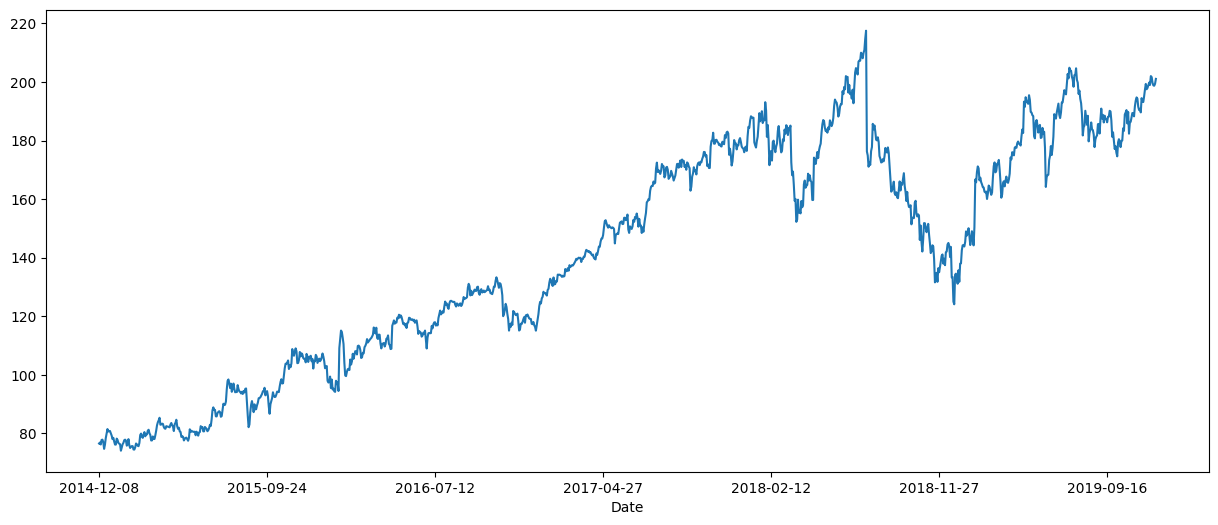

In [46]:
stock_df['Close'].plot(figsize=(15,6));

Vemos primero ejemplo sin variable exógena

In [100]:
# los datos son días
len(stock_df) # 1259 días

1259

In [105]:
1240/1259

0.9849086576648134

In [47]:
train = stock_df['Close'][0:1240].values
test = stock_df['Close'][1240:].values

Vamos a probar varios ARIMAS, a ver cuál sería la mejor combinación de hiperparámetros.

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=5975.597, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=5977.161, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=5978.841, Time=0.16 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=5979.622, Time=0.20 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=5981.437, Time=0.23 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=5977.785, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=5977.174, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=5973.080, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=5976.192, Time=0.70 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=5978.070, Time=0.55 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=5978.892, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=5974.760, Time=0.48 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=5976.355, Time=0.78 sec
 ARIMA(3,1,0)(0,0,0)

Ya lo tenemos, ahora montaremos el modelo con esos hiperparámetros y vemos que AIC tiene.

c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1240
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2982.540
Date:                Fri, 27 Sep 2024   AIC                           5973.080
Time:                        14:18:27   BIC                           5993.568
Sample:                             0   HQIC                          5980.785
                               - 1240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0125      0.012      1.065      0.287      -0.010       0.035
ar.L1          0.8642      0.086     10.019      0.000       0.695       1.033
ma.L1         -0.9007      0.075    -11.983      0.0

In [51]:
predictions = stepwise_model.predict(19)
print("mean_squared_error:", mean_squared_error(test, predictions))

mean_squared_error: 45.03314158782653


Vamos ahora a compararlo con el mismo modelo, pero en este caso le añadimos una variable exogena al entrenamiento

In [52]:
stock_df[['Open']][:1240].values

array([[ 76.18    ],
       [ 75.199997],
       [ 76.650002],
       ...,
       [194.029999],
       [191.910004],
       [190.      ]])

In [53]:
model = ARIMA(order=(1,1,1), seasonal_order=(0,0,0,1))
model.fit(train, XXXXXX = stock_df['Open'][:1240].values.reshape(-1,1))

print(model.summary())

c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: exogeneous. After release 0.14, th

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1240
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2982.540
Date:                Fri, 27 Sep 2024   AIC                           5973.080
Time:                        14:22:44   BIC                           5993.568
Sample:                             0   HQIC                          5980.785
                               - 1240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0125      0.012      1.065      0.287      -0.010       0.035
ar.L1          0.8642      0.086     10.019      0.000       0.695       1.033
ma.L1         -0.9007      0.075    -11.983      0.0

Reduce bastante el AIC

Probemos a entrenar el auto arima con la variable exogena

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=5975.597, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=5977.161, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=5978.841, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=5979.622, Time=0.19 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=5981.437, Time=0.23 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=5977.785, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=5977.174, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=5973.080, Time=0.41 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=5976.192, Time=0.82 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=5978.070, Time=0.58 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=5978.892, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=5974.760, Time=0.49 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=5976.355, Time=0.83 sec
 ARIMA(3,1,0)(0,0,0)

Probemos varias variables exogenas

NOTA: para este apartado se utiliza el valor 'Low', que en la vida real no lo tendríamos para realizar la predicción.

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=5975.597, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=5977.161, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=5978.841, Time=0.16 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=5979.622, Time=0.17 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=5981.437, Time=0.25 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=5977.785, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=5977.174, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=5973.080, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=5976.192, Time=0.64 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=5978.070, Time=0.58 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=5978.892, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=5974.760, Time=0.55 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=5976.355, Time=0.90 sec
 ARIMA(3,1,0)(0,0,0)

## SARIMA
Veamos cómo podemos predecir con datos que tienen estacionalidad, es decir, que cuentan con un patrón que se repite a lo largo del tiempo.

In [58]:
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')
print(len(df))
df.head()

204


,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


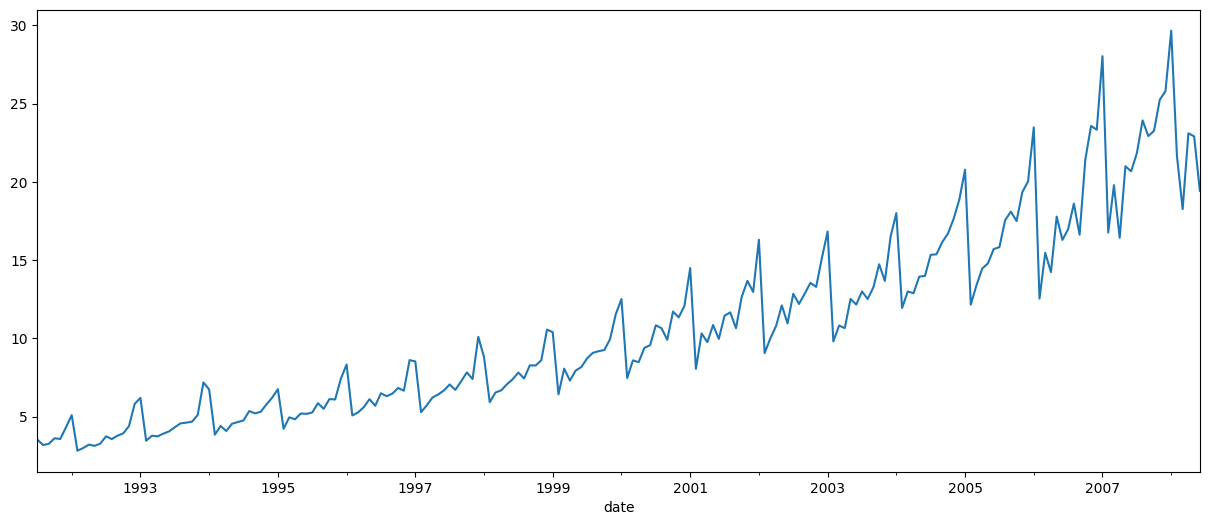

In [59]:
df['value'].plot(figsize=(15,6));

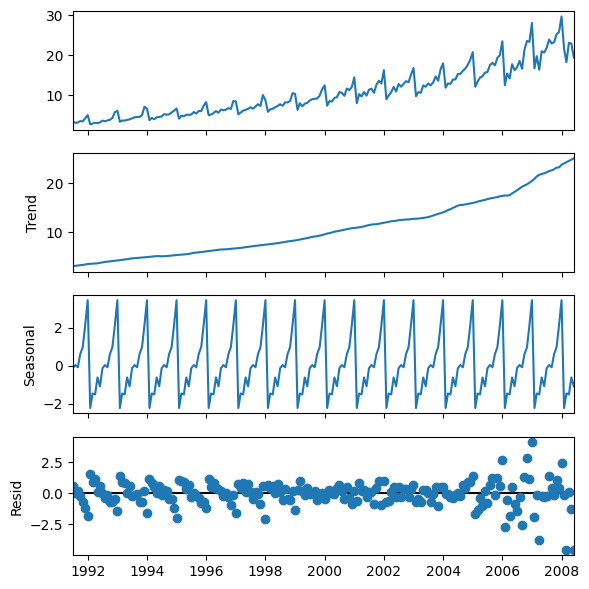

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = XXXXX

# Plot
plt.rcParams.update({'figure.figsize': (6,6)})
result_add.plot();

In [61]:
X = df[['value']]
train = X[:-20]
test = X[-20:]

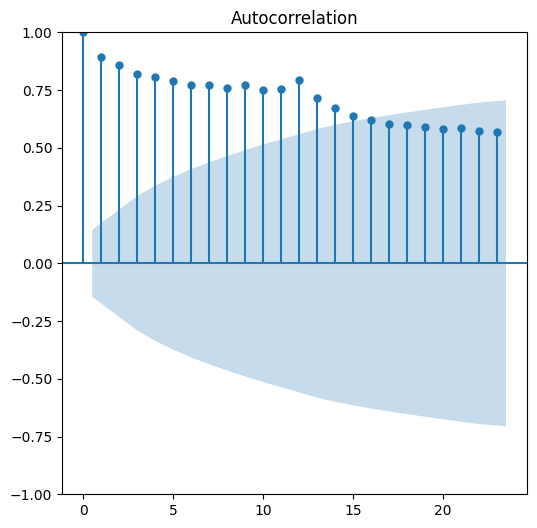

In [62]:
plot_acf(train);

Probemos el auto arima sin indicarle que hay componente de seasonality

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=764.142, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=708.405, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=699.998, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=698.968, Time=0.10 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=700.704, Time=0.14 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=750.799, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=739.394, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=698.391, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=700.362, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=700.821, Time=0.18 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=688.603, Time=0.41 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=736.404, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=700.332, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=695.600, Time=0.27 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=697.299, Time=0.35 sec
 ARIMA(3,1,0)(0,0,0)[1] i

Ahora le añadimos el componente seasonality mediante el parametro `m`.

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=480.967, Time=0.03 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=478.434, Time=0.14 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=470.746, Time=0.23 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=481.303, Time=0.05 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=475.875, Time=0.17 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=471.602, Time=0.43 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=472.097, Time=0.13 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=470.844, Time=0.35 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=1.65 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=374.346, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=366.538, Time=0.17 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=365.509, Time=0.47 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=370.891, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=367.201, Time=0.25 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=365.463, Time=0.85 sec
 ARIMA(0,1,1)(